# Chapter 4 – Training Linear Models

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [16]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear regression using the Normal Equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


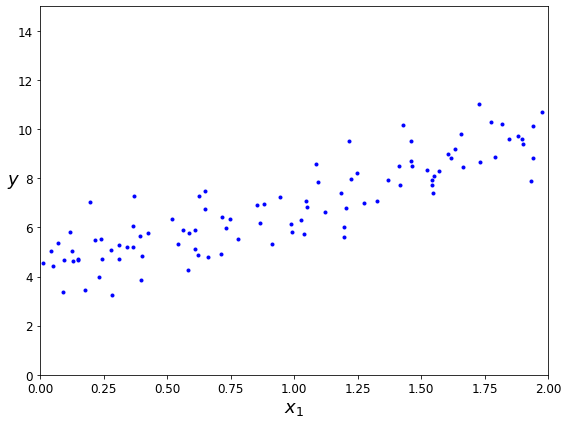

In [3]:
plt.figure(figsize=(8,6))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

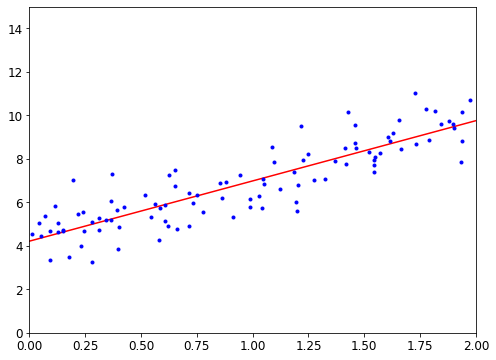

In [7]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The figure in the book actually corresponds to the following code, with a legend and axis labels:

Saving figure linear_model_predictions_plot


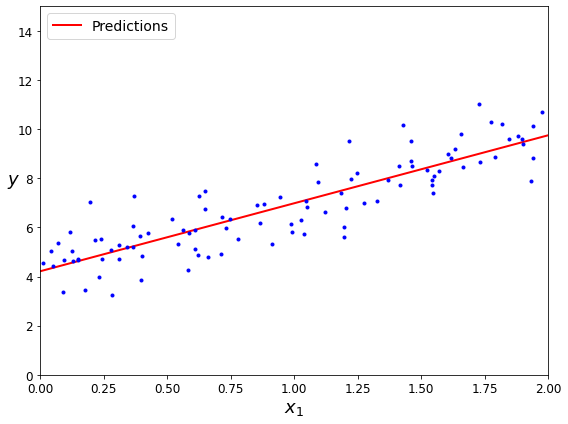

In [8]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## Linear regression using batch gradient descent

In [13]:
#np.random.randn get mean = 0, std = 1 intgers
print(np.random.randn(10000,1).mean())
print(np.random.randn(10000,1).std())

-0.0029996490567124647
1.0027207827884652


In [14]:
X_b.shape

(100, 2)

In [15]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.21509616],
       [2.77011339]])

In [17]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [18]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


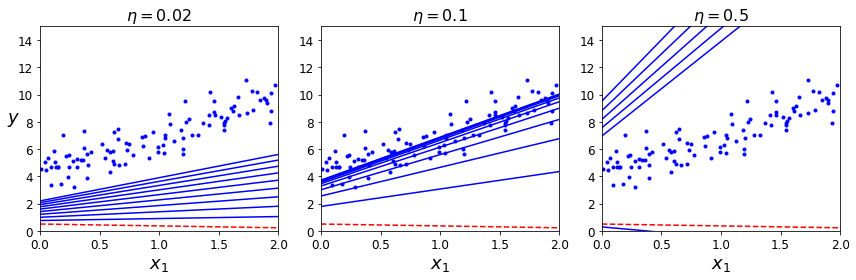

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(12,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent

In [20]:
#Return random integers from low (inclusive) to high (exclusive).
np.random.randint(1,10, size = 5)

array([8, 5, 7, 3, 7])

In [29]:
np.random.randint(1, size = 5)

array([0, 0, 0, 0, 0])

In [22]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [33]:
X_b[1:2], X_b[1:2].shape

(array([[1.        , 1.90142861]]), (1, 2))

In [34]:
X_b[1], X_b[1].shape

(array([1.        , 1.90142861]), (2,))

Saving figure sgd_plot


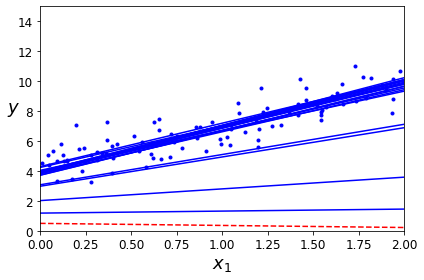

In [23]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]   # use this index [random_index:random_index+1] to keep the shape of X_b
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [25]:
theta

array([[4.21076011],
       [2.74856079]])

In [35]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [36]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## Mini-batch gradient descent

In [37]:
for i in range(0, 10, 2):
    print(i)

0
2
4
6
8


In [45]:
np.random.randn(2,1) # Random values in (0, 1) in a given shape.

array([[ 0.08704707],
       [-0.29900735]])

In [38]:
theta_path_mgd = []
m = len(X_b) # 100


n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [39]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [40]:
theta_path_mgd[0:5]

[array([[3.25245039],
        [3.11583748]]),
 array([[3.57258907],
        [3.32337431]]),
 array([[3.43380286],
        [3.12738842]]),
 array([[3.64881507],
        [3.20306935]]),
 array([[3.71429388],
        [3.20349372]])]

In [41]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


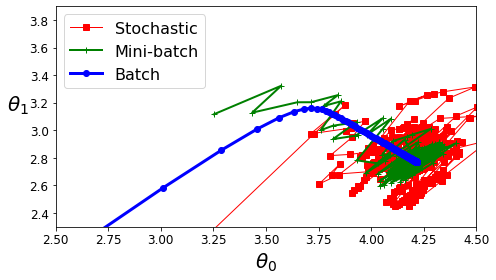

In [42]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial regression

In [43]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [57]:
# Random values in Uniform(0, 1) in a given shape.
np.max(np.random.rand(10000, 1)), np.mean(np.random.rand(10000, 1)), np.min(np.random.rand(10000, 1)), np.std(np.random.rand(10000, 1))

(0.9995765810151996,
 0.4966899550556557,
 4.867002019870448e-05,
 0.2895167878678286)

In [58]:
np.sqrt(1/12) # the variance of Uniform(0, 1) is 1/12

0.28867513459481287

In [56]:
# Random values in n(0, 1) in a given shape.
np.max(np.random.randn(10000, 1)), np.mean(np.random.randn(10000, 1)), np.min(np.random.randn(10000, 1)), np.std(np.random.randn(10000, 1))

(4.2020258997659985,
 -0.008611410915900277,
 -3.5635933339758665,
 0.9979942240389437)

In [59]:
np.random.randn(3, 1) # Random values in (0, 1) in a given shape.

array([[ 0.23963917],
       [ 2.77222149],
       [-0.5393335 ]])

In [60]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


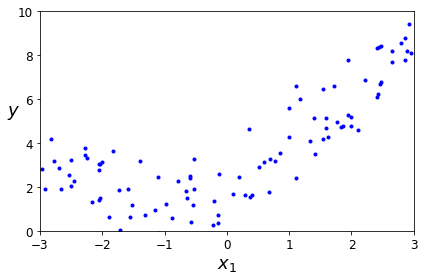

In [61]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# include_biasbool, default=True If True (default), then include a bias column, 
# the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).
X_poly = poly_features.fit_transform(X)
X[0]

array([1.76687772])

In [63]:
X_poly.shape

(100, 2)

In [64]:
# 1st column has x and 2nd column has x^2
X_poly[0]

array([1.76687772, 3.12185689])

In [66]:
1.76687772**2

3.121856877432399

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.02050922]), array([[0.9829652 , 0.47152866]]))

Saving figure quadratic_predictions_plot


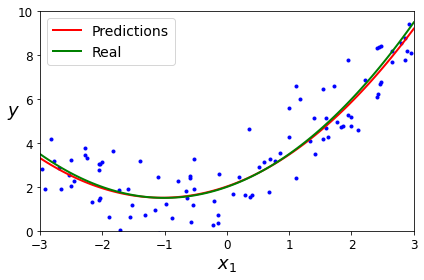

In [68]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_real = 0.5 * X_new**2 + X_new + 2
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_new, y_real, "g-", linewidth=2, label="Real")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

## Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression. For example, Figure 4-14 applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

Saving figure high_degree_polynomials_plot


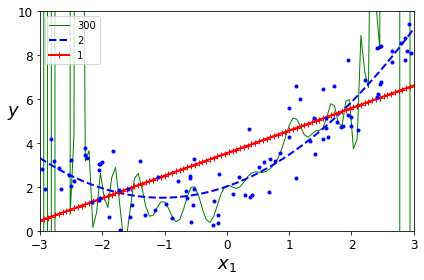

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

Figure 4-14. High-degree Polynomial Regression

This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model. But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way to tell is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. The following code defines a function that, given some training data, plots the learning curves of a model:

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


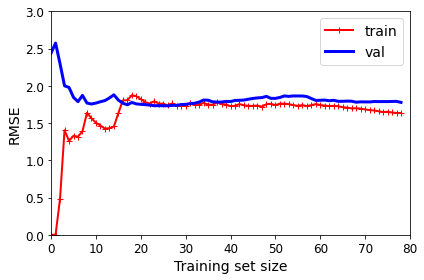

In [71]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Figure 4-15. Learning curves

- There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

This model that’s underfitting deserves a bit of explanation. First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. Now let’s look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.

>TIP

>If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data (Figure 4-16):

Saving figure learning_curves_plot


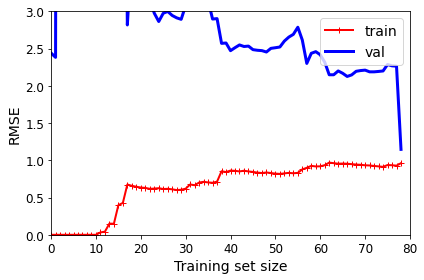

In [73]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

Figure 4-16. Learning curves for the 10th-degree polynomial model

These learning curves look a bit like the previous ones, but there are very important differences:

- The error on the training data is much lower than with the Linear Regression model.

>TIP

>One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

## Regularized models

As we saw in Chapters 1 and 2, a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

**Ridge Regression**  

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a *regularization term* equal to $\alpha\sum_{i=1}^{n}\theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha=0$, then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean. Equation 4-8 presents the Ridge Regression cost function.

*Equation 4-8. Ridge Regression cost function*

$$J(\boldsymbol\theta)=\text{MSE}(\boldsymbol\theta)+\alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2
$$

Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$, not $0$). If we define $\mathbf w$ as the vector of feature weights ($\theta_1$ to $\theta_n$), then the regularization term is equal to $\frac{1}{2}(\lVert\mathbf w \rVert_2)^2$, where $\lVert\mathbf w \rVert_2$ represents the $\ell_2$ norm of the weight vector. For Gradient Descent, just add $\alpha\mathbf w$ to the MSE gradient vector (Equation 4-6).

>WARNING

>It is important to scale the data (e.g., using a `StandardScaler`) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

Figure 4-17 shows several Ridge models trained on some linear data using different α values. On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using `PolynomialFeatures(degree=10)`, then it is scaled using a `StandardScaler`, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. Note how increasing $\alpha$ leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.

In [74]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [75]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [76]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


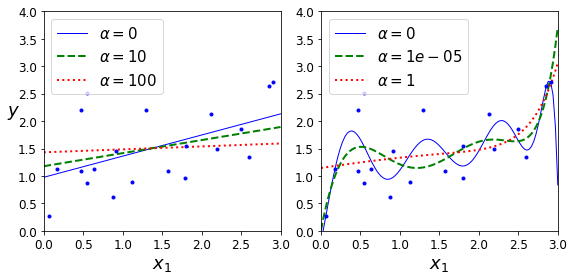

In [77]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

Figure 4-17. A linear model (left) and a polynomial model (right), both with various levels of Ridge regularization

**Note**: to be future-proof, we set `max_iter=1000` and `tol=1e-3` because these will be the default values in Scikit-Learn 0.21.

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same. Equation 4-9 shows the closed-form solution, where $\mathbf I$ is the $(n + 1) \times (n + 1)$ identity matrix, except with a $0$ in the top-left cell, corresponding to the bias term.

*Equation 4-9. Ridge Regression closed-form solution*

$$\hat{\boldsymbol\theta}=(\mathbf X^T\mathbf X+\alpha \mathbf I)^{−1}\mathbf X^T \mathbf y$$

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution (a variant of Equation 4-9 that uses a matrix factorization technique by André-Louis Cholesky):

In [78]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [85]:
ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([1.55071465])

And using Stochastic Gradient Descent:

In [82]:
y, y.shape, y.ravel(), y.ravel().shape # ravel() Return a contiguous flattened array.

(array([[0.88658943],
        [2.63556968],
        [1.49264153],
        [0.95645193],
        [2.21112714],
        [1.08347425],
        [1.13214422],
        [1.34943209],
        [1.5387507 ],
        [2.13605726],
        [0.26354769],
        [2.70533012],
        [1.84823817],
        [1.12404617],
        [0.87159971],
        [2.50995889],
        [1.44736521],
        [1.08199403],
        [2.1962808 ],
        [0.62294794]]),
 (20, 1),
 array([0.88658943, 2.63556968, 1.49264153, 0.95645193, 2.21112714,
        1.08347425, 1.13214422, 1.34943209, 1.5387507 , 2.13605726,
        0.26354769, 2.70533012, 1.84823817, 1.12404617, 0.87159971,
        2.50995889, 1.44736521, 1.08199403, 2.1962808 , 0.62294794]),
 (20,))

In [83]:
X.shape

(20, 1)

In [79]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [86]:
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/home/dan/miniconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.47012588])

The `penalty` hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the $\ell_2$ norm of the weight vector: this is simply Ridge Regression.

**Lasso Regression**  


Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $\ell_1$ norm of the weight vector instead of half the square of the $\ell_2$  norm (see Equation 4-10).

Equation 4-10. Lasso Regression cost function 

$$J(\boldsymbol\theta)=\text{MSE}(\boldsymbol\theta)+\alpha\sum_{i=1}^{n}|\theta_i|$$

Figure 4-18 shows the same thing as Figure 4-17 but replaces Ridge models with Lasso models and uses smaller α values.

/home/dan/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8028677038274528, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


Saving figure lasso_regression_plot


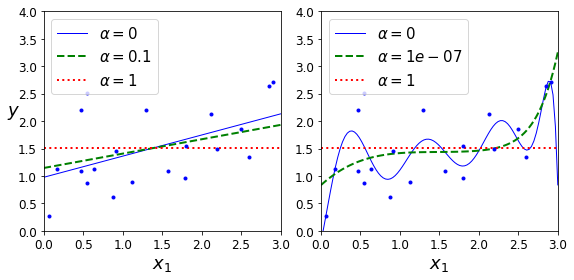

In [88]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

Figure 4-18. A linear model (left) and a polynomial model (right), both using various levels of Lasso regularization

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). For example, the dashed line in the righthand plot in Figure 4-18 (with $\alpha = 10^{-7}$) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

You can get a sense of why this is the case by looking at Figure 4-19: the axes represent two model parameters, and the background contours represent different loss functions. In the top-left plot, the contours represent the $\ell_1$ loss $(|\theta_1| + |\theta_2|)$, which drops linearly as you get closer to any axis. For example, if you initialize the model parameters to $\theta_1 = 2$ and $\theta_2 = 0.5$, running Gradient Descent will decrement both parameters equally (as represented by the dashed yellow line); therefore $\theta_2$ will reach $0$ first (since it was closer to $0$ to begin with). After that, Gradient Descent will roll down the gutter until it reaches $\theta_1 = 0$ (with a bit of bouncing around, since the gradients of $\ell_1$ never get close to $0$: they are either –1 or 1 for each parameter). In the top-right plot, the contours represent Lasso’s cost function (i.e., an MSE cost function plus an $\ell_1$ loss). The small white circles show the path that Gradient Descent takes to optimize some model parameters that were initialized around $\theta_1 = 0.25$ and $\theta_2 = –1$: notice once again how the path quickly reaches $\theta_2 = 0$, then rolls down the gutter and ends up bouncing around the global optimum (represented by the red square). If we increased $\alpha$, the global optimum would move left along the dashed yellow line, while if we decreased $\alpha$, the global optimum would move right (in this example, the optimal parameters for the unregularized MSE are $\theta_1 = 2$ and $\theta_2 = 0.5$).

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [90]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
#numpy.ravel Return a contiguous flattened array.
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape) 
# ord =1 is max(sum(abs(x), axis=0))
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)
# ord =2 is 2-norm (largest sing. value)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [91]:
print(t1)
t1.shape

[[-1.         -0.99198397 -0.98396794 ...  2.98396794  2.99198397
   3.        ]
 [-1.         -0.99198397 -0.98396794 ...  2.98396794  2.99198397
   3.        ]
 [-1.         -0.99198397 -0.98396794 ...  2.98396794  2.99198397
   3.        ]
 ...
 [-1.         -0.99198397 -0.98396794 ...  2.98396794  2.99198397
   3.        ]
 [-1.         -0.99198397 -0.98396794 ...  2.98396794  2.99198397
   3.        ]
 [-1.         -0.99198397 -0.98396794 ...  2.98396794  2.99198397
   3.        ]]


(500, 500)

In [92]:
print(t1.ravel())
t1.ravel().shape

[-1.         -0.99198397 -0.98396794 ...  2.98396794  2.99198397
  3.        ]


(250000,)

In [93]:
Xr[:, :1]

array([[1.],
       [1.],
       [1.]])

Saving figure lasso_vs_ridge_plot


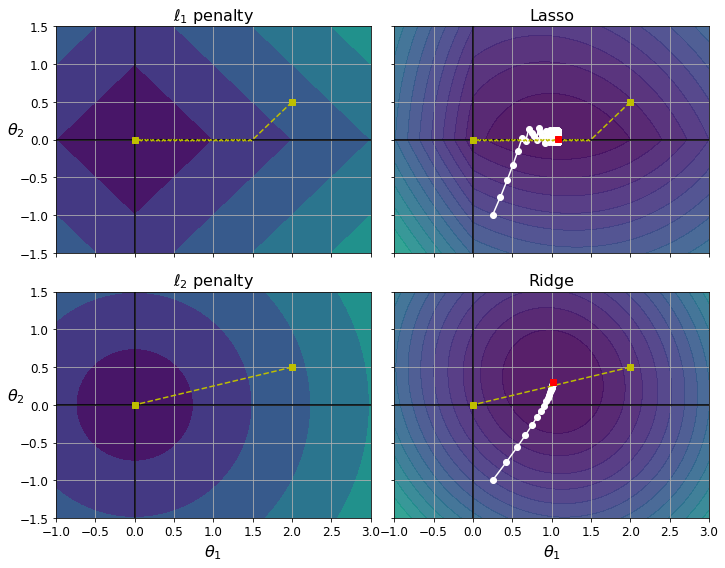

In [94]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

<div style="text-align:left"> Figure 4-19. Lasso versus Ridge regularization </div>

The two bottom plots show the same thing but with an $\ell_2$ penalty instead. In the bottom-left plot, you can see that the $\ell_2$ loss decreases with the distance to the origin, so Gradient Descent just takes a straight path toward that point. In the bottom-right plot, the contours represent Ridge Regression’s cost function (i.e., an MSE cost function plus an $\ell_2$ loss). There are two main differences with Lasso. First, the gradients get smaller as the parameters approach the global optimum, so Gradient Descent naturally slows down, which helps convergence (as there is no bouncing around). Second, the optimal parameters (represented by the red square) get closer and closer to the origin when you increase $α$, but they never get eliminated entirely.

>TIP

>To avoid Gradient Descent from bouncing around the optimum at the end when using Lasso, you need to gradually reduce the learning rate during training (it will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge).

The Lasso cost function is not differentiable at $\theta_i = 0$ (for $i = 1, 2, \cdots, n$), but Gradient Descent still works fine if you use a subgradient vector $g$ instead when any $\theta_i = 0$. Equation 4-11 shows a subgradient vector equation you can use for Gradient Descent with the Lasso cost function. 

*Equation 4-11. Lasso Regression subgradient vector*
$$g(\boldsymbol\theta,J)=\nabla_{\boldsymbol\theta}\text{ MSE}(\boldsymbol\theta)+\alpha\begin{pmatrix}\text{sign}(\theta_1)\\\text{sign}(\theta_2)\\
\vdots\\
\text{sign}(\theta_n)\end{pmatrix}\text{ where sign}(\theta_i)=\begin{cases}
-1,  & \text{ if } \theta_i<0 \\
0, & \text{ if } \theta_i=0\\
1, & \text{ if } \theta_i>0\\
\end{cases}$$

Here is a small Scikit-Learn example using the Lasso class:

In [95]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Note that you could instead use `SGDRegressor(penalty="l1")`.

**Elastic Net**  


Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio $r$. When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression (see Equation 4-12).

*Equation 4-12. Elastic Net cost function*
$$J(\boldsymbol\theta)=\text{MSE}(\boldsymbol\theta)+r\alpha\sum_{i=1}^{n}|\theta_i|+\frac{1−r}{2}\alpha\sum_{i=1}^{n}\theta_i^2$$

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed. In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

Here is a short example that uses Scikit-Learn’s `ElasticNet` (`l1_ratio` corresponds to the mix ratio $r$):

In [96]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

**Early Stopping**  

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called *early stopping*. Figure 4-20 shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent. As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”



>TIP

>With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

In [97]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
X.shape

(100, 1)

In [98]:
y[:50].ravel().shape

(50,)

Early stopping example:

In [99]:
float("inf")

inf

In [108]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


minimum_val_error = float("inf")
best_epoch = None
best_model = None
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [109]:
best_epoch

0

In [110]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Create the graph:

Saving figure early_stopping_plot


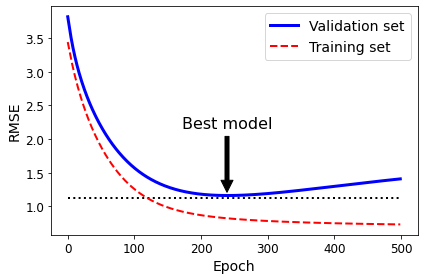

In [111]:

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

Figure 4-20. Early stopping regularization

Note that with `warm_start=True`, when the `fit()` method is called it continues training where it left off, instead of restarting from scratch.

In [112]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False))

## Logistic regression

As we discussed in Chapter 1, some regression algorithms can be used for classification (and vice versa). *Logistic Regression* (also called *Logit Regression*) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

**Estimating Probabilities** 


So how does Logistic Regression work? Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the **logistic** of this result (see Equation 4-13).

*Equation 4-13. Logistic Regression model estimated probability (vectorized form)*

$$\hat p=h_{\theta}(\mathbf x)=\sigma(\mathbf x^T\boldsymbol\theta)$$
The logistic—noted $\sigma(\cdot)$—is a *sigmoid function* (i.e., S-shaped) that outputs a number between $0$ and $1$. It is defined as shown in Equation 4-14 and Figure 4-21.

*Equation 4-14. Logistic function*
$$\sigma(t)=\frac{1}{1+\exp(−t)}$$

Saving figure logistic_function_plot


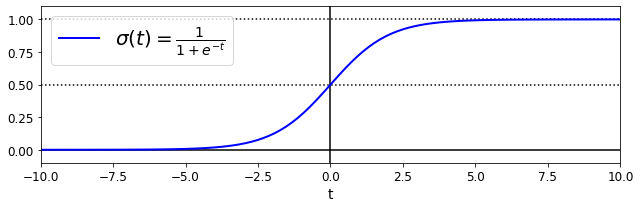

In [113]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

Figure 4-21. Logistic function

Once the Logistic Regression model has estimated the probability $\hat p=h_{\boldsymbol\theta}(\mathbf x)=\sigma(\mathbf x^T\boldsymbol\theta)$ that an instance $\mathbf x$ belongs to the positive class, it can make its prediction $\hat y$ easily (see Equation 4-15). 

*Equation 4-15. Logistic Regression model prediction*
$$\hat y=\begin{cases}
0, \text{ if } \hat p < 0.5\\
1, \text{ if } \hat p \ge 0.5\\
\end{cases}$$

Notice that $\sigma(t) < 0.5$ when $t < 0$, and $\sigma(t) \ge 0.5$ when $t \ge 0$, so a Logistic Regression model predicts $1$ if $\mathbf x^T\boldsymbol\theta$ is positive and $0$ if it is negative.

>The score $t$ is often called the *logit*. The name comes from the fact that the logit function, defined as $t = \text{logit}(p) = \log(p / (1 – p))$, is the inverse of the logistic function. Indeed, if you compute the logit of the estimated probability $p$, you will find that the result is $t$. The logit is also called the *log-odds*, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

**Training and Cost Function** 

Now you know how a Logistic Regression model estimates probabilities and makes predictions. But how is it trained? The objective of training is to set the parameter vector $\boldsymbol\theta$ so that the model estimates high probabilities for positive instances $(y = 1)$ and low probabilities for negative instances $(y = 0)$. This idea is captured by the cost function shown in Equation 4-16 for a single training instance $\mathbf x$.

*Equation 4-16. Cost function of a single training instance*
$$c(\boldsymbol\theta)=\begin{cases}
−\log(\hat p), \text{ if } y=1\\
−\log(1-\hat p), \text{ if } y=0\\
\end{cases}$$

This cost function makes sense because $–\log(t)$ grows very large when $t$ approaches $0$, so the cost will be large if the model estimates a probability close to $0$ for a positive instance, and it will also be very large if the model estimates a probability close to $1$ for a negative instance. On the other hand, $–\log(t)$ is close to $0$ when $t$ is close to $1$, so the cost will be close to $0$ if the estimated probability is close to $0$ for a negative instance or close to $1$ for a positive instance, which is precisely what we want.

The cost function over the whole training set is the average cost over all training instances. It can be written in a single expression called the *log loss*, shown in Equation 4-17.  

*Equation 4-17. Logistic Regression cost function (log loss)*

$$J(\boldsymbol\theta)=−\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log(\hat p^{(i)})+(1-y^{(i)})\log(1-\hat p^{(i)})\right]$$

The bad news is that there is no known closed-form equation to compute the value of $\boldsymbol\theta$ that minimizes this cost function (there is no equivalent of the Normal Equation). The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost function with regard to the $j^{th}$ model parameter $\theta_j$ are given by Equation 4-18. 

*Equation 4-18. Logistic cost function partial derivatives*

$$\frac{\partial}{\partial\theta_j}J(\boldsymbol\theta)=−\frac{1}{m}\sum_{i=1}^{m}\left[\sigma(\boldsymbol\theta^T\mathbf x^{(i)})-y^{(i)}\right]x_j^{(i)}$$

This equation looks very much like Equation 4-5: for each instance it computes the prediction error and multiplies it by the $j^{th}$ feature value, and then it computes the average over all training instances. Once you have the gradient vector containing all the partial derivatives, you can use it in the Batch Gradient Descent algorithm. That’s it: you now know how to train a Logistic Regression model. For Stochastic GD you would take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time.

**Decision Boundaries**  

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica (see Figure 4-22).

<img src="./chapters/4/mls2_0422.png">
<div style="text-align:center"> Figure 4-22. Flowers of three iris plant species </div>

Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let’s load the data:

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [2]:
iris["data"][:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
import numpy as np
X = iris["data"][:, 3:]  # petal width in cm
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [9]:
iris["data"][:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [10]:
X[:2]

array([[0.2],
       [0.2]])

**Note**: To be future-proof we set `solver="lbfgs"` since this will be the default value in Scikit-Learn 0.22.

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

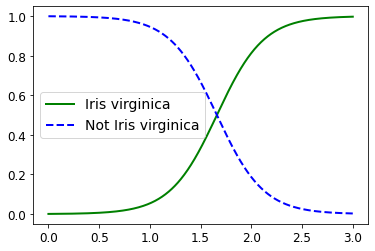

In [19]:
import matplotlib.pyplot as plt
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend(loc="center left", fontsize=14)

In [20]:
X_new.shape, y_proba.shape

((1000, 1), (1000, 2))

The figure in the book actually is actually a bit fancier:

/home/dan/miniconda3/lib/python3.8/site-packages/matplotlib/patches.py:1387: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


Saving figure logistic_regression_plot


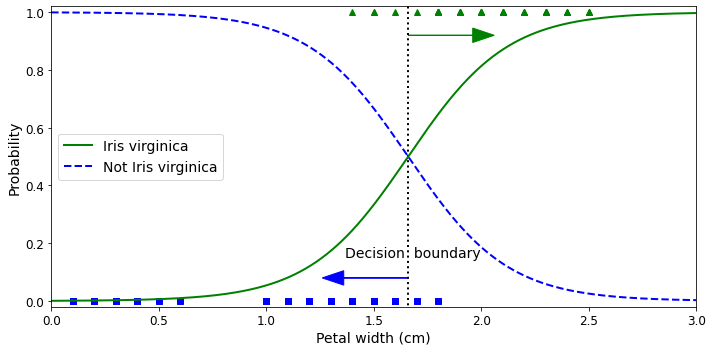

In [21]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [23]:
decision_boundary

array([1.66066066])

Figure 4-23. Estimated probabilities and decision boundary

The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class), while below 1 cm it is highly confident that it is not an Iris virginica (high probability for the “Not Iris virginica” class). In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the `predict()` method rather than the `predict_proba()` method), it will return whichever class is the most likely. Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident):

In [25]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Figure 4-24 shows the same dataset, but this time displaying two features: petal width and length. Once trained, the Logistic Regression classifier can, based on these two features, estimate the probability that a new flower is an Iris virginica. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris virginica, according to the model.

In [34]:
np.linspace(2.9, 7, 10).reshape(-1, 1)

array([[2.9       ],
       [3.35555556],
       [3.81111111],
       [4.26666667],
       [4.72222222],
       [5.17777778],
       [5.63333333],
       [6.08888889],
       [6.54444444],
       [7.        ]])

In [41]:
x = np.linspace(-5, 5, 5)
y = np.linspace(-5, 5, 10)
# full coorindate arrays
xx, yy = np.meshgrid(x, y)
xx, xx.shape, yy, yy.shape

(array([[-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ],
        [-5. , -2.5,  0. ,  2.5,  5. ]]),
 (10, 5),
 array([[-5.        , -5.        , -5.        , -5.        , -5.        ],
        [-3.88888889, -3.88888889, -3.88888889, -3.88888889, -3.88888889],
        [-2.77777778, -2.77777778, -2.77777778, -2.77777778, -2.77777778],
        [-1.66666667, -1.66666667, -1.66666667, -1.66666667, -1.66666667],
        [-0.55555556, -0.55555556, -0.55555556, -0.55555556, -0.55555556],
        [ 0.55555556,  0.55555556,  0.55555556,  0.55555556,  0.55555556],
        [ 1.66666667,  1.66666667,  1.66666667,  1.66666667,  1.66666667],
        [ 2.77777778,  2.77777778,  2.77777778,  2.77777778,  2

Saving figure logistic_regression_contour_plot


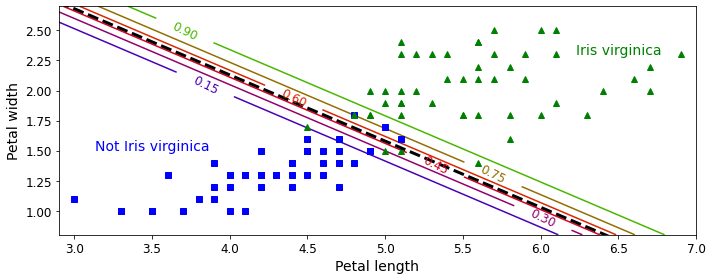

In [26]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width (150, 2)
y = (iris["target"] == 2).astype(np.int) # (150,)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid( # Return coordinate matrices from coordinate vectors.
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )  # x0 (200, 500); x1 (200, 500)
X_new = np.c_[x0.ravel(), x1.ravel()] # x0.ravel().shape (100000,)
# X_new shape is (100000, 2)
y_proba = log_reg.predict_proba(X_new)
# y_proba.shape is (100000, 2)


plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape) # x0 (200, 500)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7]) # left_right shape is (2,)
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [40]:
X.shape, y.shape, x0.shape, x1.shape, x0.ravel().shape

((150, 2), (10,), (200, 500), (200, 500), (100000,))

In [49]:
x0[0:3], X_new.shape, y_proba.shape, left_right.shape, log_reg.coef_.shape, log_reg.coef_[0]

(array([[2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ],
        [2.9       , 2.90821643, 2.91643287, ..., 6.98356713, 6.99178357,
         7.        ]]),
 (100000, 2),
 (100000, 2),
 (2,),
 (1, 2),
 array([ 5.75452052, 10.44681114]))

Figure 4-24. Linear decision boundary

Just like the other linear models, Logistic Regression models can be regularized using $\ell_1$ or $\ell_2$ penalties. Scikit-Learn actually adds an $\ell_2$ penalty by default.

>NOTE

>The hyperparameter controlling the regularization strength of a Scikit-Learn `LogisticRegression` model is not `alpha` (as in other linear models), but its inverse: `C`. The higher the value of `C`, the less the model is regularized.

**Softmax Regression** 

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers (as discussed in Chapter 3). This is called *Softmax Regression*, or *Multinomial Logistic Regression*.

The idea is simple: when given an instance $\mathbf x$, the Softmax Regression model first computes a score $s_k(\mathbf x)$ for each class $k$, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(\mathbf x)$ should look familiar, as it is just like the equation for Linear Regression prediction (see Equation 4-19).

*Equation 4-19. Softmax score for class $k$* 

$$s_k(\mathbf x)=\mathbf x^T\boldsymbol\theta^{(k)}$$ 
Note that each class has its own dedicated parameter vector $\boldsymbol\theta^{(k)}$. All these vectors are typically stored as rows in a *parameter matrix* $\Theta$.

Once you have computed the score of every class for the instance $\mathbf x$, you can estimate the probability $\hat p_k$ that the instance belongs to class $k$ by running the scores through the softmax function (Equation 4-20). The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

*Equation 4-20. Softmax function*

$$\hat p_k=\sigma(s(\mathbf x))_k=\frac{\exp(s_k(\mathbf x))}{\sum_{j=1}^{K}\exp(s_j(\mathbf x))}$$ 

In this equation:

- $K$ is the number of classes.

- $s(\mathbf x)$ is a vector containing the scores of each class for the instance $\mathbf x$.

- $\sigma(s(\mathbf x))_k$ is the estimated probability that the instance $\mathbf x$ belongs to class $k$, given the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), as shown in Equation 4-21.

*Equation 4-21. Softmax Regression classifier prediction*

$$\hat y=\underset{k}{\text{ argmax }}\sigma(s(\mathbf x))_k=\underset{k}{\text{ argmax }}s(\mathbf x)_k = \underset{k}{\text{ argmax }}\left((\boldsymbol\theta^{(k)})^T\mathbf x\right)$$ 

The `argmax` operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(s(\mathbf x))_k$.

>TIP

>The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput), so it should be used only with mutually exclusive classes, such as different types of plants. You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions, let’s take a look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function shown in Equation 4-22, called the *cross entropy*, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. *Cross entropy* is frequently used to measure how well a set of estimated class probabilities matches the target classes.

*Equation 4-22. Cross entropy cost function*

$$J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_k^{(i)}\log\left(\hat p_k^{(i)}\right)$$

In this equation:

- $y_k^{(i)}$ is the target probability that the $i^{th}$ instance belongs to class $k$. In general, it is either equal to $1$ or $0$, depending on whether the instance belongs to the class or not.

Notice that when there are just two classes $(K = 2)$, this cost function is equivalent to the Logistic Regression’s cost function (log loss; see Equation 4-17).

The gradient vector of this cost function with regard to $\boldsymbol\theta^{(k)}$ is given by Equation 4-23.

*Equation 4-23. Cross entropy gradient vector for class $k$*

$$\nabla_{\boldsymbol\theta^{(k)}}J(\Theta)=\frac{1}{m}\sum_{i=1}^{m}\left(\hat p_k^{(i)}-\hat y_k^{(i)}\right)\mathbf x^{(i)}$$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\Theta$ that minimizes the cost function.

### The sigmoid output and cross-entropy cost function
The quadratic cost function $$C=\frac{(y-a)^2}{2},\tag{3.1}$$ where $a$ is the neuron’s output when the training input $x = 1$ is used, and $y = 0$ is the
corresponding desired output. To write this more explicitly in terms of the weight and bias, recall that $a = \sigma(z)$, where $z = wx + b$. Using the chain rule to differentiate with respect to the weight and bias we get
$$\frac{\partial C}{\partial w}=(a-y)\sigma'(z)x=a\sigma'(z)x\tag{3.2}$$
$$\frac{\partial C}{\partial b}=(a-y)\sigma'(z)=a\sigma'(z)\tag{3.3}$$
Since $$\sigma'(z)=\left(\frac{1}{1+e^{-x}}\right)'=\sigma(z)(1-\sigma(z))$$ when the neuron’s output is close to $1$, the $\sigma'(z)$ gets very small and the learning slowdown.


We define the cross-entropy cost function for this neuron by 
$$C=-\frac{1}{n}\sum_x[y\ln a+(1-y)\ln(1-a)],\tag{3.4}$$ where $n$ is the total number of items of training data, the sum is over all training inputs, $x$, and $y$ is the corresponding desired output.
We substitute $a=\sigma(z)$ into (3.4), and apply the chain rule twice, obtaining:
$$\begin{align}
\frac{\partial C}{\partial w_j}&=-\frac{1}{n}\sum_x\left(\frac{y}{\sigma(z)}-\frac{1-y}{1-\sigma(z)}\right)\frac{\partial \sigma}{\partial w_j}\\
&=-\frac{1}{n}\sum_x\left(\frac{y}{\sigma(z)}-\frac{1-y}{1-\sigma(z)}\right)\sigma'(z)x_j\\
&=\frac{1}{n}\sum_x\frac{\sigma(z)-y}{\sigma(z)(1-\sigma(z))}\sigma'(z)x_j\\
&=\frac{1}{n}\sum_x(\sigma(z)-y)x_j\tag{3.5}
\end{align}$$ It tells us that the rate at which the weight learns is controlled by $(\sigma(z)-y)$, i.e., by the error in the output. 

Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s `LogisticRegression` uses one-versus-the-rest by default when you train it on more than two classes, but you can set the `multi_class` hyperparameter to `"multinomial"` to switch it to Softmax Regression. You must also specify a `solver` that supports Softmax Regression, such as the `"lbfgs"` solver (see Scikit-Learn’s documentation for more details). It also applies $\ell_2$ regularization by default, which you can control using the hyperparameter `C`:

In [50]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

So the next time you find an iris with petals that are 5 cm long and 2 cm wide, you can ask your model to tell you what type of iris it is, and it will answer *Iris virginica* (class 2) with 94.2% probability (or *Iris versicolor* with 5.8% probability):

In [51]:
softmax_reg.predict([[5, 2]])

array([2])

In [52]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Figure 4-25 shows the resulting decision boundaries, represented by the background colors. Notice that the decision boundaries between any two classes are linear. The figure also shows the probabilities for the Iris versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary). Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

Saving figure softmax_regression_contour_plot


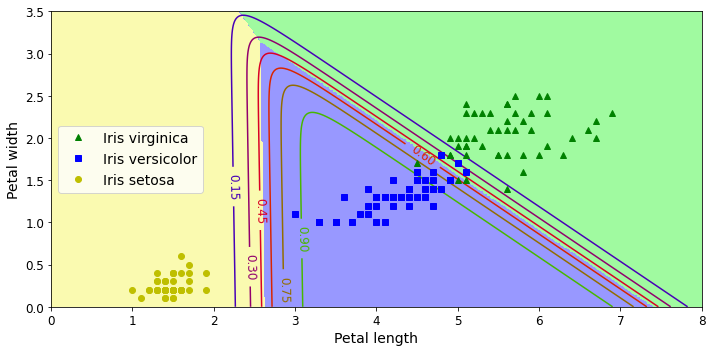

In [54]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 5))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 8, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

Figure 4-25. Softmax Regression decision boundaries

## Exercise solutions

1. Which Linear Regression training algorithm can you use if you have a training set with millions of features? 
> If you have a training set with millions of features you can use Stochastic Gradient Descent or Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But you cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than quadratically) with the number of features.

2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?
> If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before training the model. Note that the Normal Equation or SVD approach will work just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features are not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.
3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?
> Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex.

4. Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?
> If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?
> If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly the problem and you should reduce the learning rate. However, if the training error is not going up, then your model is overfitting the training set and you should stop training.

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?
> Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent is guaranteed to make progress at every single training iteration. So if you immediately stop training when the validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never beat the record), you can revert to the best saved model.

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?
> Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with a very small mini-batch size). However, only Batch Gradient Descent will actually converge, given enough training time. As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless you gradually reduce the learning rate.


8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?
> If the validation error is much higher than the training error, this is likely because your model is overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model with fewer degrees of freedom is less likely to overfit. Another thing you can try is to regularize the model—for example, by adding an $\ell_2$ penalty (Ridge) or an $\ell_1$ penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model. Lastly, you can try to increase the size of the training set.

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?
> If both the training error and the validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has a high bias. You should try reducing the regularization hyperparameter α.


10. Why would you want to use:

- Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
> A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression.

- Lasso instead of Ridge Regression?
> Lasso Regression uses an $\ell_1$ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.

- Elastic Net instead of Lasso?
> Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. If you want Lasso without the erratic behavior, you can just use Elastic Net with an `l1_ratio` close to `1`.

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?
>If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression classifiers.


12. Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [55]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [56]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [58]:
X[0:2], y[0:2]

(array([[1.4, 0.2],
        [1.4, 0.2]]),
 array([0, 0]))

We need to add the bias term for every instance ($x_0 = 1$):

In [59]:
import numpy as np
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [60]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [61]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [62]:
y.max()

2

In [63]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [64]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [65]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [66]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [67]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [68]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [70]:
Y_train_one_hot.shape, Y_proba.shape

((90, 3), (90, 3))

In [76]:
Y_train_one_hot[0], np.log(Y_proba)[0], Y_train_one_hot[0] * np.log(Y_proba)[0]

(array([1., 0., 0.]),
 array([-0.1362837 , -2.18132871, -4.23267405]),
 array([-0.1362837, -0.       , -0.       ]))

In [69]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta) # X^T\theta
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [77]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [78]:
Theta[1:]

array([[-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Let's make predictions for the validation set and check the accuracy score:

In [79]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [81]:
np.r_[np.array([1,2,3]), 0, 0, np.array([4,5,6])]

array([1, 2, 3, 0, 0, 4, 5, 6])

In [80]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]] 
    # np.r_:  Translates slice objects to concatenation along the first axis.
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.4946891059460322
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [82]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [84]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.6493356854880625
500 0.5669748012204155
1000 0.5419107848691385
1500 0.5350832456702977
2000 0.5330576580213247
2500 0.5325724165002779
2701 0.5325460643024782
2702 0.5325460649360696 early stopping!


In [85]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

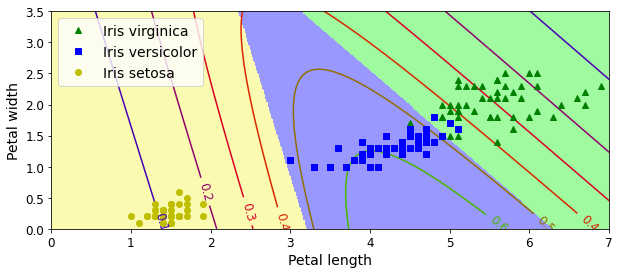

In [86]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

And now let's measure the final model's accuracy on the test set:

In [87]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.